# How to install:

```bash
bash$: conda create -n astrohack python=3.8
bash$: conda activate astrohack
bash$: pip install astrohack
```

# Start Dask Cluster

In [1]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(
        n_workers=24,
        threads_per_worker=1,
        memory_limit='21GB'
    )

client = Client(cluster) 
print(client.dashboard_link)

http://127.0.0.1:8787/status


# Create holog_obs_description

```
holog_obs_description = {0 :
                            {'scans':[2,4,6,8,10,12,14,16,18,20,22],
                             'ant':{'EA25':['EA04', 'EA08', 'EA12', 'EA27', 'EA19']}
                            }
                         }
```

In [2]:
from astrohack.extract_holog import extract_holog
import numpy as np
import json
DA = [
    'DA41', 'DA42', 'DA43', 
    'DA44', 'DA45', 'DA46', 
    'DA48', 'DA49', 'DA50', 
    'DA51', 'DA52', 'DA53', 
    'DA54', 'DA55', 'DA56', 
    'DA57', 'DA58', 'DA59'
]
DV = [
    'DV02', 'DV03', 'DV04', 
    'DV11', 'DV12', 'DV13', 
    'DV14', 'DV15', 'DV16', 
    'DV17', 'DV18', 'DV19', 
    'DV20', 'DV21', 'DV22', 
    'DV23', 'DV24', 'DV25'
] 

def gen_holog_obs_description_alma(holog_scans,scans,map_ant_names,ref_ant_names):
    holog_obs_description = {}
    
    for i,holog_scan in enumerate(holog_scans):
        holog_obs_description[holog_scan]={'scans':[scans[i]]}
        
        holog_obs_description[holog_scan]['ant']={}
        for ant_name in map_ant_names:
            holog_obs_description[holog_scan]['ant'][ant_name]=ref_ant_names
            
    return holog_obs_description


holog_scans = [0,1,2]
scans = [2,6,10] 
map_ant_names = DV
ref_ant_names = DA
holog_obs_description_0 = gen_holog_obs_description_alma(holog_scans,scans,map_ant_names,ref_ant_names)

holog_scans = [3,4,5]
scans = [4,8,12] 
map_ant_names = DA
ref_ant_names = DV
holog_obs_description_1 = gen_holog_obs_description_alma(holog_scans,scans,map_ant_names,ref_ant_names)

holog_obs_description = {**holog_obs_description_0,**holog_obs_description_1}
holog_obs_description['ddi'] = np.array([0])
print(json.dumps(holog_obs_description, indent=2, default=str))

{
  "0": {
    "scans": [
      2
    ],
    "ant": {
      "DV02": [
        "DA41",
        "DA42",
        "DA43",
        "DA44",
        "DA45",
        "DA46",
        "DA48",
        "DA49",
        "DA50",
        "DA51",
        "DA52",
        "DA53",
        "DA54",
        "DA55",
        "DA56",
        "DA57",
        "DA58",
        "DA59"
      ],
      "DV03": [
        "DA41",
        "DA42",
        "DA43",
        "DA44",
        "DA45",
        "DA46",
        "DA48",
        "DA49",
        "DA50",
        "DA51",
        "DA52",
        "DA53",
        "DA54",
        "DA55",
        "DA56",
        "DA57",
        "DA58",
        "DA59"
      ],
      "DV04": [
        "DA41",
        "DA42",
        "DA43",
        "DA44",
        "DA45",
        "DA46",
        "DA48",
        "DA49",
        "DA50",
        "DA51",
        "DA52",
        "DA53",
        "DA54",
        "DA55",
        "DA56",
        "DA57",
        "DA58",
        "DA59"
      ],
      "DV1

# Extract Holog

In [3]:
from astrohack.extract_holog import extract_holog
extract_holog(
    ms_name='/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3', 
    holog_name='/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3', 
    holog_obs_dict=holog_obs_description,
    data_col='DATA',
    subscan_intent='MIXED',
    parallel=True,
    overwrite=True
)

[2023-03-07 09:06:56.719551 Warning]: [extract_holog] Warning, current holography files will be overwritten.
[2023-03-07 09:06:57.156798 System Info]: Opening measurement file /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.ms.split.calibrated.SPW3/DATA_DESCRIPTION
[2023-03-07 09:06:57.187203 System Info]: Processing ddi: 0, scans: [2]
[2023-03-07 09:06:57.190571 System Info]: Processing ddi: 0, scans: [6]
[2023-03-07 09:06:57.193373 System Info]: Processing ddi: 0, scans: [10]
[2023-03-07 09:06:57.196293 System Info]: Processing ddi: 0, scans: [4]
[2023-03-07 09:06:57.199040 System Info]: Processing ddi: 0, scans: [8]
[2023-03-07 09:06:57.201707 System Info]: Processing ddi: 0, scans: [12]


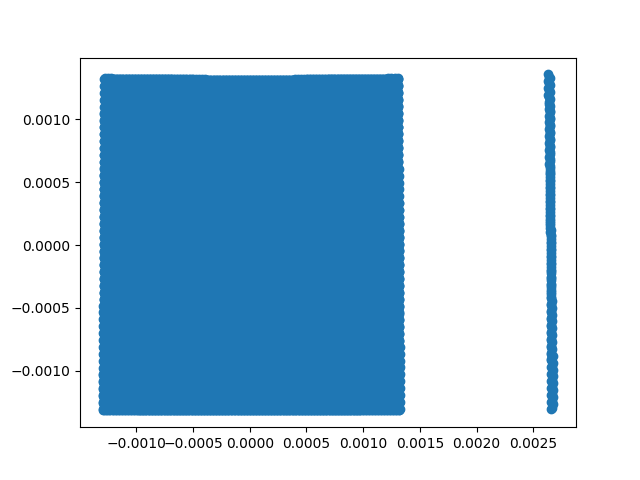

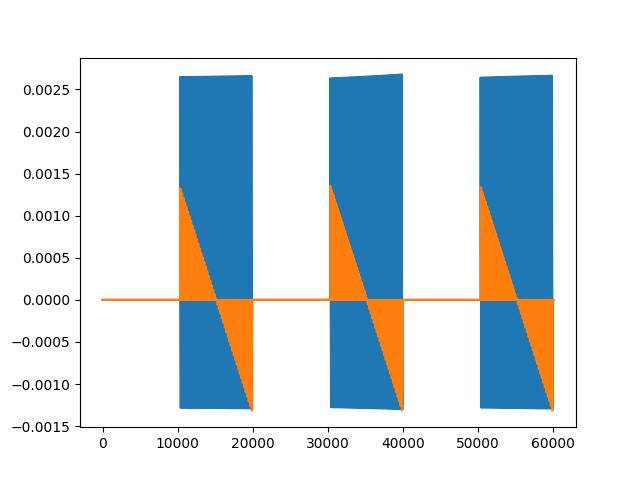

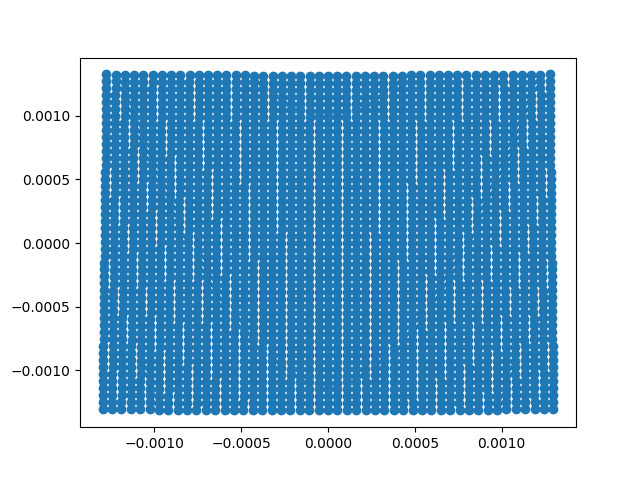

In [10]:
from astrohack.dio import _load_pnt_dict
import xarray as xr
#%matplotlib widget
import matplotlib.pyplot as plt
pnt_ds = _load_pnt_dict('/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3.point.zarr')

pnt_ds
ant_id = 3
plt.figure()
plt.scatter(pnt_ds[ant_id].DIRECTIONAL_COSINES[:,0],pnt_ds[ant_id].DIRECTIONAL_COSINES[:,1])
plt.show()

plt.figure()
plt.plot(pnt_ds[ant_id].DIRECTIONAL_COSINES[:,0])
plt.plot(pnt_ds[ant_id].DIRECTIONAL_COSINES[:,1])
plt.show()

ds = xr.open_zarr('/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3.holog.zarr/0/4/3')
plt.figure()
plt.scatter(ds.DIRECTIONAL_COSINES[:,0],ds.DIRECTIONAL_COSINES[:,1])
plt.show()

# Holog

In [5]:
from astrohack import holog
grid_size = None
cell_size = None
grid_interpolation_mode = 'linear' #'nearest' 'linear' 'cubic'
chan_average = True
chan_tolerance_factor = 0.005
reference_scaling_frequency = None #1.5*10**10 #None #In Hz
#spw_average if True users has to give reference_scaling_frequency
scan_average = True

holog(holog_file='/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3.holog.zarr', padding_factor=50, 
      parallel=True,
      grid_size=grid_size, cell_size=cell_size, grid_interpolation_mode=grid_interpolation_mode,
      chan_average = chan_average, chan_tolerance_factor = chan_tolerance_factor,
      reference_scaling_frequency=reference_scaling_frequency,
      scan_average = scan_average,
     )

[2023-03-07 09:08:07.017356 System Info]: Loading holography file /.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3.holog.zarr ...
[2023-03-07 09:08:07.025290 System Info]: Cell size: [5.3252003e-05 5.3252003e-05] Grid size [49 49]
[2023-03-07 09:08:07.025325 System Info]: Processing ant_id: 31
[2023-03-07 09:08:07.026023 System Info]: Processing ant_id: 22
[2023-03-07 09:08:07.026423 System Info]: Processing ant_id: 28
[2023-03-07 09:08:07.026970 System Info]: Processing ant_id: 25
[2023-03-07 09:08:07.027496 System Info]: Processing ant_id: 32
[2023-03-07 09:08:07.027846 System Info]: Processing ant_id: 19
[2023-03-07 09:08:07.028192 System Info]: Processing ant_id: 21
[2023-03-07 09:08:07.028549 System Info]: Processing ant_id: 26
[2023-03-07 09:08:07.028992 System Info]: Processing ant_id: 35
[2023-03-07 09:08:07.029372 System Info]: Processing ant_id: 24
[2023-03-07 09:08:07.029707 System Info]: Processing ant_id: 29
[2023-03-07 09:08:07.030046 System Info]: Processing ant

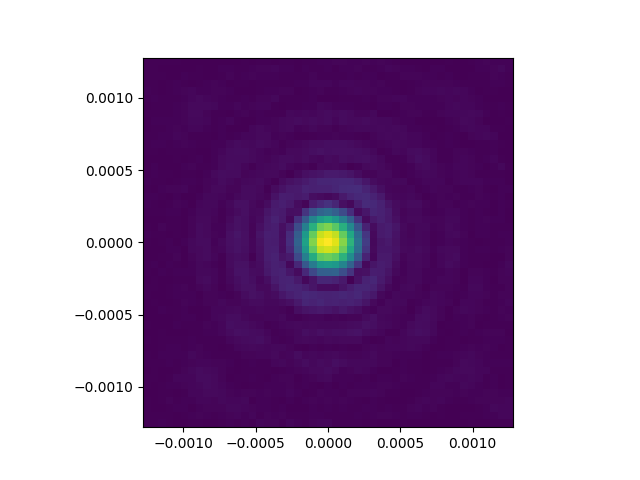

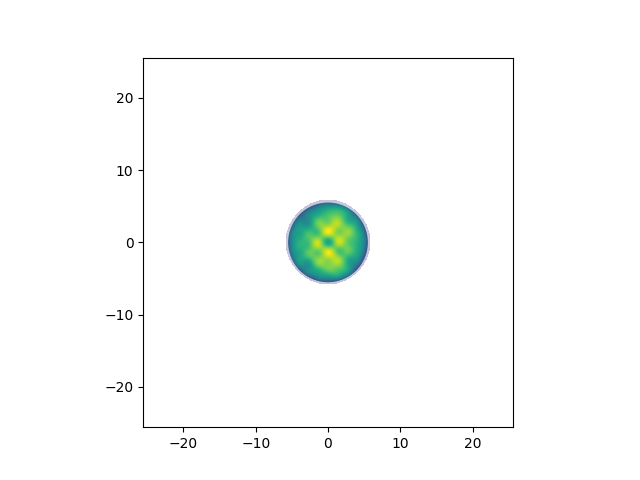

In [11]:
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.patches as patches

ds = xr.open_zarr('/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3.image.zarr/3/0')
wavelength = scipy.constants.speed_of_light/ds.chan.values[0]
l = ds.l.values
m = ds.m.values
u = ds.u.values*wavelength
v = ds.v.values*wavelength

plt.figure()
plt.imshow(np.abs(ds.BEAM[0,0,0,:,:]),extent=[l.min(), l.max(), m.min(), m.max()])
plt.show()

circle = patches.Circle((0,0), 6, fill=False, color='white', alpha=0.7, linewidth=5)

fig, ax =plt.subplots()
plt.imshow(np.abs(ds.APERTURE[0,0,0,:,:]),extent=[u.min(), u.max(), v.min(), v.max()])
ax.add_patch(circle)
plt.show()

# Panel

In [7]:
from astrohack.panel import panel
image = '/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3'
#ddi = [1] 
ddi = None
panel_kind = 'rigid'

panel(
    holog_image=image, 
    panel_kind=panel_kind,
    outfile='/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3',
    aipsdata=False, 
    unit='miliinches', 
    save_mask=True,
    save_phase=True,
    parallel=True
)

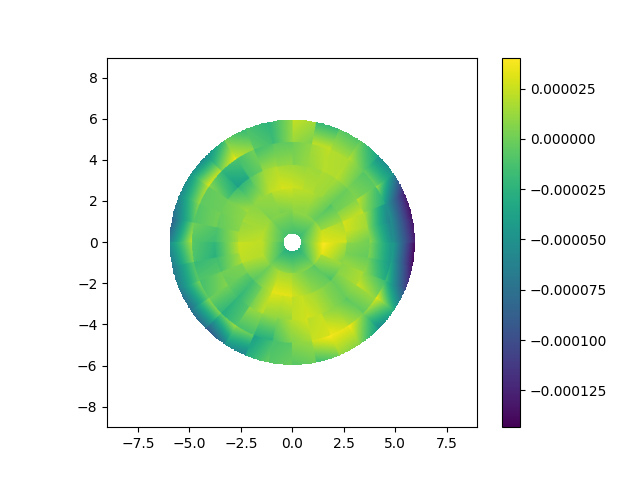

In [8]:
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

ds = xr.open_zarr('/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3.panel.zarr/ALMA DA_DA44/0/xds.zarr')

u = ds.u.values
v = ds.v.values

plt.figure()
plt.imshow(ds.CORRECTIONS,extent=[u.min(), u.max(), v.min(), v.max()])
plt.colorbar()
plt.show()

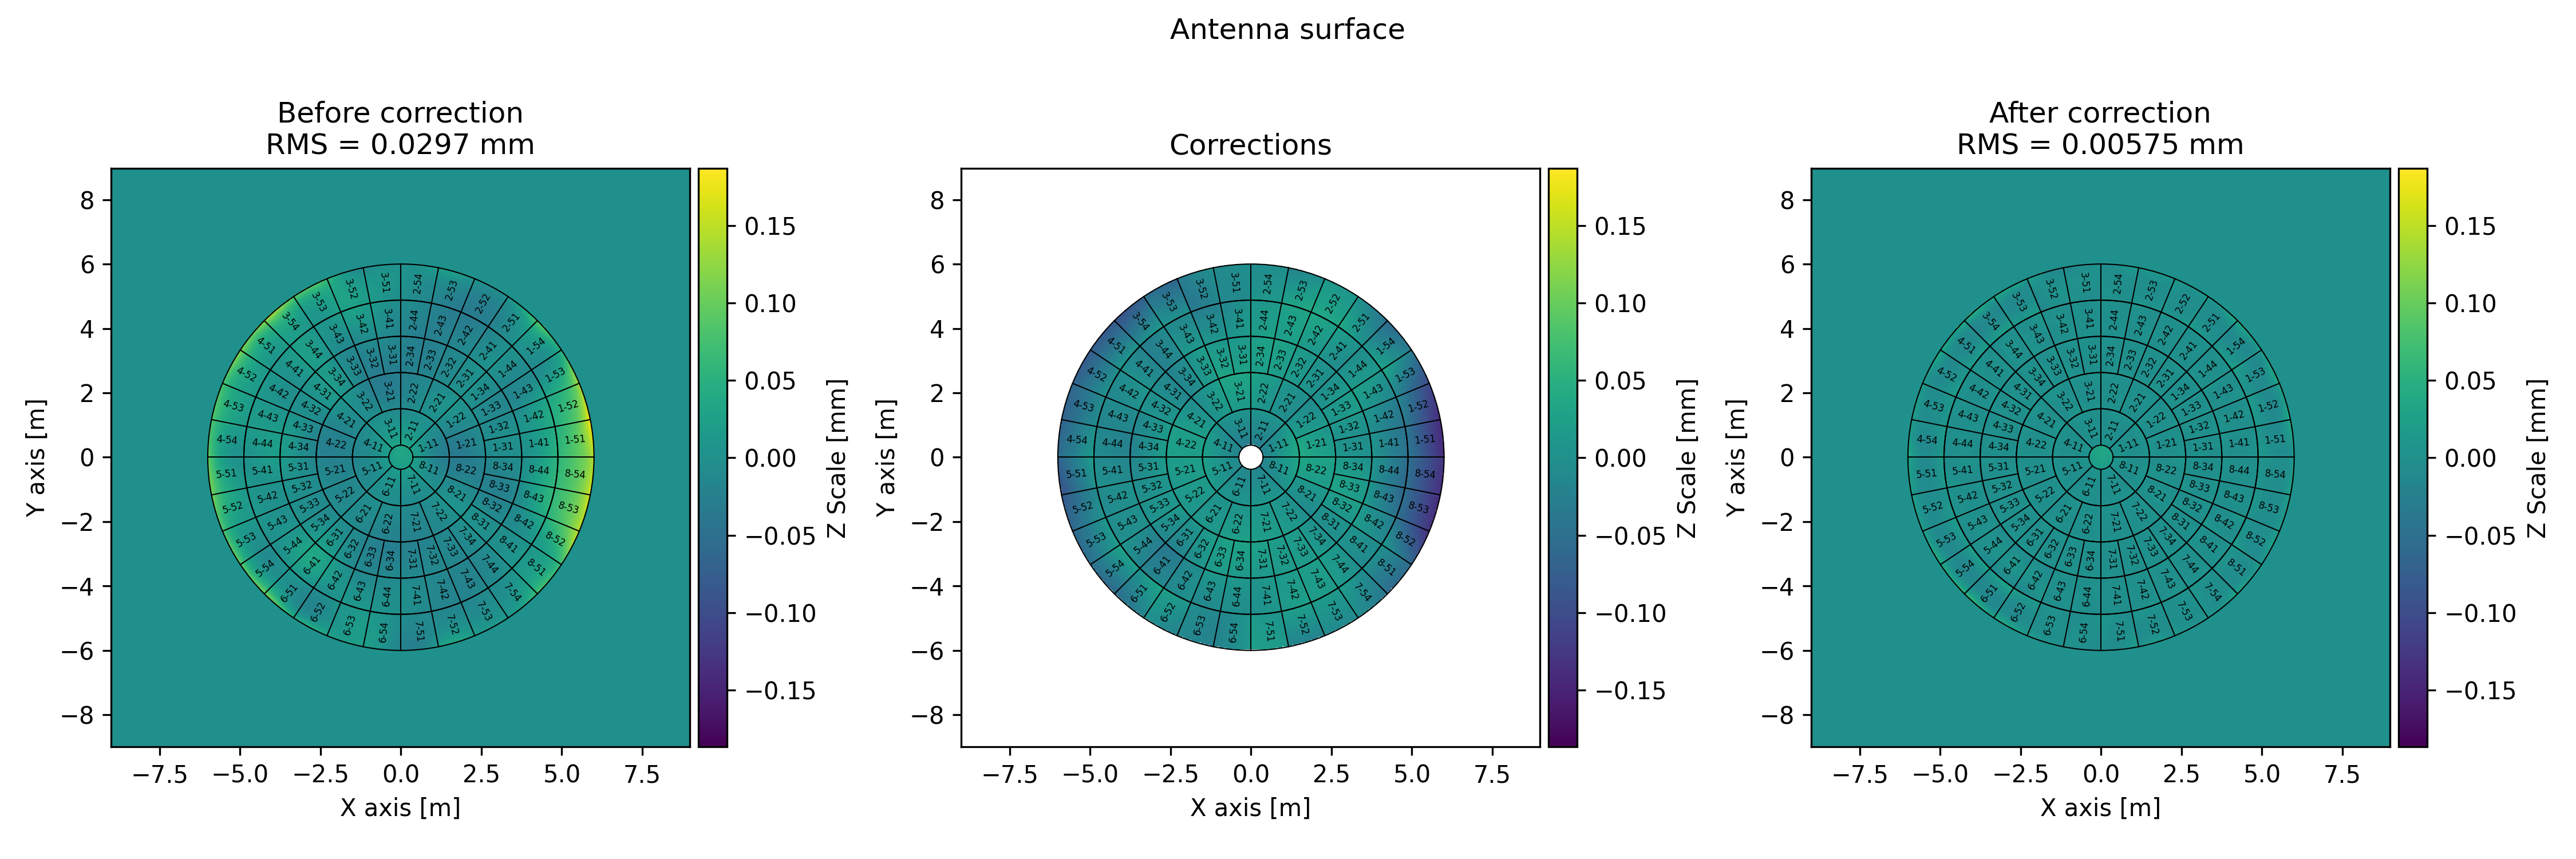

In [9]:
from IPython.display import Image
Image(filename = "/.lustre/cv/projects/casa/holo/demo/J1924/J1924-2914.SPW3.panel.zarr/ALMA DA_DA44/0/surface.png", width=1000, height=1000)